In [1]:
!pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anthropic                         0.45.2
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy         

In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cmake dlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install face_recognition

Note: you may need to restart the kernel to use updated packages.


In [5]:
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import dlib
import cv2
 
import face_recognition

In [ ]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [6]:
# face_landmark_path = 'lib/landmark/shape_predictor_68_face_landmarks.dat'
# predictor = dlib.shape_predictor(face_landmark_path)
detector = dlib.get_frontal_face_detector()
predictor = face_recognition.api.pose_predictor_68_point

In [7]:
image_path = 'image/image.jpg' 
org_image = cv2.imread(image_path) 
image = org_image.copy() 
image = imutils.resize(image, width=500) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
 
rects = detector(gray, 1)

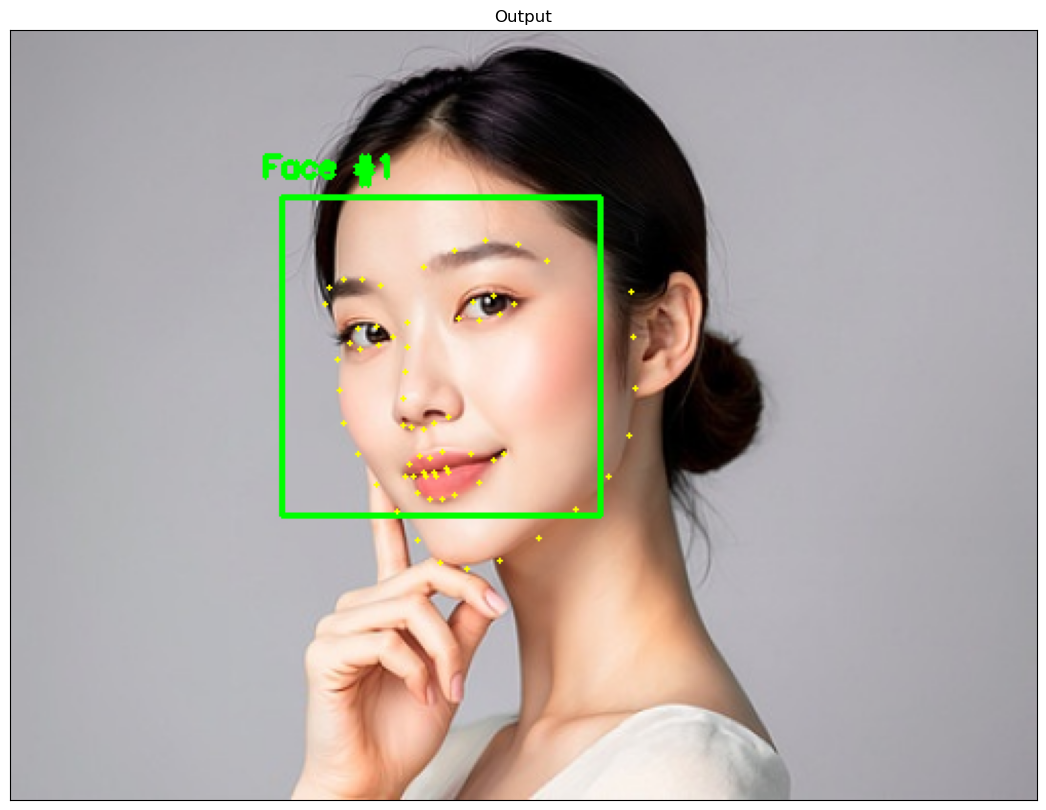

In [8]:
for (i, rect) in enumerate(rects):
    # 얼굴 영역의 얼굴 랜드마크를 결정한 다음 
    # 얼굴 랜드마크(x, y) 좌표를 NumPy Array로 변환합니다.
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    # dlib의 사각형을 OpenCV bounding box로 변환(x, y, w, h)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # 얼굴 랜드마크에 포인트를 그립니다.
    for (i, (x, y)) in enumerate(shape):
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        # cv2.putText(image, str(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1)
        
plt_imshow("Output", image, figsize=(16,10))

In [10]:
import cv2
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

In [11]:
classifier = cv2.CascadeClassifier(cv2.data.haarcascades +
                                       'haarcascade_frontalface_default.xml')

In [12]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [28]:
import cv2
# 카메라 연결하기
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()

    if not ret:
        break

    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 흑백사진에서 얼굴검출
    # 각 얼굴의 좌상단위치(x,y) 가로세로크기(w,h)를 반환
    faces = face_cascade.detectMultiScale(img_gray)
    # 검출된 얼굴 표시하기
    for (x,y,w,h) in faces :
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
        # 검출된 얼굴영역 안에서 눈 검출
        ## 검출된 얼굴 영역 자르기
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        ## 얼굴 영역에서 눈 검출하기
        ## 눈 영역의 좌상단좌표(x,y), 눈의 가로세로크기(w,h) 출력
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,0,255),2)


    cv2.imshow('camera', img)

    k = cv2.waitKey(33)
    # 1번 종료버튼 만들기
    if k == 49:
        break
    
        
cap.release()
cv2.destroyAllWindows()
# 가끔 끊기는 느낌이 나는 이유
# k = cv2.waitKey(33) : 한 사진에서 0.033초 동안 머무른다
# 얼굴 검출 후 눈을 검출하는 시간이 조금 소요 (0.01초라 가정)
# 한 사진에 투자되는 시간 = 0.033 + 0.01 = 0.043초
# 1초에 판단할 수 있는 사진 23 ~ 24장

KeyboardInterrupt: 

In [30]:
import cv2
import dlib
import imutils
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 감지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # 얼굴 랜드마크 예측
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # 얼굴 영역 표시 (Bounding Box)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # 얼굴 랜드마크 표시
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

    # 화면 출력
    cv2.imshow("Real-time Face Detection", frame)

    # 종료 조건 (ESC 키)
    if cv2.waitKey(1) & 0xFF == 27:
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()

In [23]:
!pip install torch torchvision torchaudio

In [28]:
import torch
print(torch.__version__) 

2.6.0+cpu


In [5]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [23]:
from transformers import AutoModelForImageClassification, AutoProcessor
import torch
import requests
from PIL import Image
import cv2
import io

# 모델 및 프로세서 로드 (Hugging Face에서 가져오기)
model_name = "TahaDouaji/drowsiness-detection"  # 여기에 사용할 모델 이름 입력
model = AutoModelForImageClassification.from_pretrained(model_name)
processor = AutoProcessor.from_pretrained(model_name, use_fast=True)
response = requests.get(img_url, stream=True)

# 테스트용 이미지 다운로드
img_url = "https://cdn.mindgil.com/news/photo/202012/70479_6111_0219.jpg"  # 테스트할 이미지 URL
response = requests.get(img_url, stream=True)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # 3. 이미지 전처리
    inputs = processor(images=img, return_tensors="pt")

    # 4. 예측 실행
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_label = logits.argmax(-1).item()

    # 5. ImageNet 1K 클래스 레이블 가져오기
    LABELS_URL = "https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt"
    labels = requests.get(LABELS_URL).text.splitlines()

    # 6. 예측된 클래스 이름 출력
    predicted_label_name = labels[predicted_label]
    print(f"Predicted class: {predicted_label_name} (Index: {predicted_label})")

else:
    print(f"이미지 다운로드 실패, 상태 코드: {response.status_code}")

OSError: TahaDouaji/drowsiness-detection is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [6]:
!git clone https://github.com/Boubker10/SafeDriveVision

Cloning into 'SafeDriveVision'...


In [7]:
import SafeDriveVision

In [8]:
!pip install --upgrade opencv-python pillow numpy

  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.3 which is incompatible.
pinecone-text 0.9.0 requires numpy<2.0,>=1.26; python_version >= "3.12", but you have numpy 2.2.3 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.1.0 which is incompatible.


In [11]:
import cv2
import dlib
import imutils
import numpy as np #추가
from imutils import face_utils
from scipy.spatial import distance as dist #추가
from PIL import ImageFont, ImageDraw, Image #한글 폰트

# 한글 폰트 경로 설정 (Windows 기준, 다른 OS는 별도 폰트 필요)
fontpath = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font = ImageFont.truetype(fontpath, 30)  # 폰트 크기 설정

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


# 눈과 입의 랜드마크 인덱스
(lStart, lEnd) = (42, 48)  # 오른쪽 눈
(rStart, rEnd) = (36, 42)  # 왼쪽 눈
(mStart, mEnd) = (48, 68)  # 입

# 눈 깜빡임 기준값 (EAR)
EYE_AR_THRESH = 0.25
EYE_AR_CONSEC_FRAMES = 30  # 몇 프레임 연속 감겼는지 확인
COUNTER = 0

# 입 벌림 기준값 (MAR)
MOUTH_AR_THRESH = 0.75  # 하품 감지 임계값

def eye_aspect_ratio(eye):
    """눈의 EAR (눈 깜빡임 비율)을 계산하는 함수"""
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

def mouth_aspect_ratio(mouth):
    """입의 MAR (입 벌림 비율)을 계산하는 함수"""
    A = dist.euclidean(mouth[2], mouth[10])
    B = dist.euclidean(mouth[4], mouth[8])
    C = dist.euclidean(mouth[0], mouth[6])
    return (A + B) / (2.0 * C)

# 하품 지속 감지를 위한 카운트 변수 추가
MOUTH_AR_CONSEC_FRAMES = 22.5  # 1초 동안 하품 지속 (30FPS 기준)
MOUTH_COUNTER = 0  # 하품 지속 시간 카운트 변수

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 감지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # 얼굴 랜드마크 예측
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # 얼굴 영역 표시 (Bounding Box)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # 눈 영역 가져오기
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        # EAR 평균값 계산
        ear = (leftEAR + rightEAR) / 2.0

        # 입 영역 가져오기
        mouth = shape[mStart:mEnd]
        mar = mouth_aspect_ratio(mouth)

        # 하품 감지 - 일정 시간 유지되어야 졸음으로 판단
        if mar > MOUTH_AR_THRESH:
            MOUTH_COUNTER += 1  # 하품 지속 시간 증가
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES:
                frame = put_text_korean(frame, "졸음 감지됨! (하품 유지)", (10, 90), (0, 0, 255))
        else:
            MOUTH_COUNTER = 0  # 하품이 멈추면 카운터 초기화

        # 눈이 감긴 경우 감지
        if ear < EYE_AR_THRESH:
            COUNTER += 1
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                frame = put_text_korean(frame, "졸음 감지됨!", (10, 30), (0, 0, 255))
        else:
            COUNTER = 0

        # 하품 감지 (입이 크게 벌어졌을 때)
        if mar > MOUTH_AR_THRESH:
            frame = put_text_korean(frame, "하품 감지됨!", (10, 60), (0, 0, 255))

        # 얼굴 랜드마크 표시
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

    # 화면 출력
    cv2.imshow("Real-time Face Detection", frame)

    # 종료 조건 (ESC 키)
    if cv2.waitKey(1) & 0xFF == 27:
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()

In [ ]:
!pip uninstall numpy

In [ ]:
np.__version__

'1.26.4'

In [ ]:
!pip install pygame

In [27]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from scipy.spatial import distance as dist
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 눈과 입의 랜드마크 인덱스
(lStart, lEnd) = (42, 48)  # 오른쪽 눈
(rStart, rEnd) = (36, 42)  # 왼쪽 눈
(mStart, mEnd) = (48, 68)  # 입

# 졸음 감지 관련 변수
EYE_CLOSED_TIME = 0  # 눈 감고 있는 누적 시간 (초)
SLEEPY_WARNING_ACTIVE = False  # 졸음 경고 활성 여부
LAST_DROWSY_TIME = None  # 마지막 졸음 상태 기록
LAST_WARNING_TIME = None  # 마지막 경고 상태 기록
DROWSY_DISPLAY_TIME = 3  # 주의 상태 표시 시간 (눈 떠도 유지)
WARNING_DISPLAY_TIME = 60  # 경고 상태 표시 시간 (1분간 유지)

# 졸음 감지 단계 변수
DROWSY_WARNING_COUNT = 0  # 졸음 주의 단계 발생 횟수
DROWSY_ALERT_FRAMES = 0  # 졸음 경고 유지 시간 (프레임 단위)
DROWSY_ALERT_DURATION = 90  # 경고 상태 유지 (3초)
EYE_CLOSED_WARNING = 1  # 1초 이상 눈 감은 상태 유지 (주의)
EYE_CLOSED_DANGER = 2  # 2초 이상 눈 감은 상태 유지 (경고)

# 졸음 감지 기준
EYE_AR_THRESH = 0.2  # 눈 감은 상태 기준
EYE_AR_CONSEC_FRAMES = 30  # 1초 이상 눈 감음 유지 (30FPS 기준)
MOUTH_AR_THRESH = 0.75  # 하품 기준
MOUTH_AR_CONSEC_FRAMES = 30  # 1초 동안 하품 유지
EYE_BLINK_MIN = 12  # 1분 기준 눈 깜빡임 횟수 (최소)
EYE_BLINK_MAX = 22  # 1분 기준 눈 깜빡임 횟수 (최대)
YAWN_THRESH = 2  # 1분 기준 하품 횟수
YAWN_THRESH_DANGER = 3  # 1분 기준 하품 3회 (경고)

# 🚨 경고 문구 유지 프레임 설정 (60프레임 = 약 2초)
ALERT_DISPLAY_FRAMES = 0
ALERT_DURATION = 60  # 60프레임 동안 유지 (2초)

# 주의 분산 기준
GAZE_TIME_THRESH = 2  # 시선 이탈 시간 (초)
GAZE_COUNT_THRESH = 2  # 시선 이탈 횟수
HEAD_ANGLE_THRESH_X = 45  # 좌우 각도 기준
HEAD_ANGLE_THRESH_Y = 20  # 상하 각도 기준
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (1단계)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (2단계)

# 카운트 변수
EYE_COUNTER = 0  # 눈 감은 시간 카운트
MOUTH_COUNTER = 0  # 하품 지속 카운트
BLINK_COUNTER = 0  # 눈 깜빡임 횟수 (1분 내)
BLINK_COUNT = 0
YAWN_COUNTER = 0  # 하품 횟수 (1분 내)
GAZE_COUNTER = 0  # 시선 이탈 시간 카운트
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_RESET_TIME = time.time()  # 1분 기준으로 초기화
RESET_TIME = time.time()  # 1분 기준 초기화 시간

# 🚀 경고 및 주의 상태 변수 추가
DROWSY_WARNING_ACTIVE = False  # ⚠️ 졸음 주의 상태 여부
SLEEPY_WARNING_ACTIVE = False  # 🚨 졸음 경고 상태 여부

# ✅ 변수 초기화 추가 (NameError 방지)
LAST_YAWN_TIME = 0  # 마지막 하품 감지 시간 초기화
YAWN_DISPLAY_TIME = 3  # 하품 문구 유지 시간 (초)


# 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"  # 경고음 파일 필요

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")


def eye_aspect_ratio(eye):
    """눈의 EAR(눈 감김 비율) 계산"""
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

def mouth_aspect_ratio(mouth):
    """입의 MAR(입 벌림 비율) 계산"""
    A = dist.euclidean(mouth[2], mouth[10])
    B = dist.euclidean(mouth[4], mouth[8])
    C = dist.euclidean(mouth[0], mouth[6])
    return (A + B) / (2.0 * C)
    

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 프레임 크기 조정
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 감지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # 얼굴 랜드마크 예측
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ **바운딩 박스 (초록색)**
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # ✅ **얼굴 랜드마크 점 (노란색)**
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

        # 눈 영역
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = dist.euclidean(leftEye[1], leftEye[5]) / dist.euclidean(leftEye[0], leftEye[3])
        rightEAR = dist.euclidean(rightEye[1], rightEye[5]) / dist.euclidean(rightEye[0], rightEye[3])

        # 입 영역
        mouth = shape[mStart:mEnd]
        mar = dist.euclidean(mouth[2], mouth[10]) / dist.euclidean(mouth[0], mouth[6])

        # EAR & MAR 계산
        ear = (leftEAR + rightEAR) / 2.0
        mar = mouth_aspect_ratio(mouth)

        # ✅ **졸음 감지 (눈 감음)**
        if ear < EYE_AR_THRESH:
            EYE_CLOSED_TIME += 1 / 30  # 30FPS 기준으로 초 단위 계산
            
            # ✅ **졸음 주의 단계 감지 (눈 감은 시간 1초 이상)**
            if EYE_CLOSED_TIME >= 1 and not SLEEPY_WARNING_ACTIVE:
                frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))  # 노란색
                LAST_DROWSY_TIME = time.time()  # 마지막 졸음 감지 시간 업데이트

            # ✅ **졸음 경고 단계 감지 (눈 감은 시간 2초 이상)**
            if EYE_CLOSED_TIME >= 2:
                frame = put_text_korean(frame, "🚨 졸음 경고! 운전 중지 필요!", (10, 90), (0, 0, 255))
                pygame.mixer.music.play()
                SLEEPY_WARNING_ACTIVE = True  # 경고 활성화
                LAST_WARNING_TIME = time.time()  # 마지막 경고 감지 시간 업데이트

        else:
            # ✅ **눈을 떴을 때 "졸음 주의" 상태 일정 시간 유지**
            if LAST_DROWSY_TIME and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
                frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))

            # ✅ **눈을 떴을 때 "졸음 경고" 상태 일정 시간 유지**
            if LAST_WARNING_TIME and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
                frame = put_text_korean(frame, "🚨 졸음 경고! 눈을 뜨세요!", (10, 90), (0, 0, 255))
            else:
                SLEEPY_WARNING_ACTIVE = False  # 1분이 지나면 경고 해제

            # ✅ **눈을 뜬 후, 경고 상태가 아니라면 카운트 초기화**
            if not SLEEPY_WARNING_ACTIVE:
                EYE_CLOSED_TIME = 0


        # ✅ **졸음 감지 (눈 감음)**
            if EYE_CLOSED_TIME >= 2:  # 🚨 졸음 경고 조건
                frame = put_text_korean(frame, "🚨 졸음 경고! 운전 중지 필요!", (10, 90), (0, 0, 255))
                pygame.mixer.music.play()
                SLEEPY_WARNING_ACTIVE = True
                LAST_WARNING_TIME = time.time()
            
            elif EYE_CLOSED_TIME >= 1 and not SLEEPY_WARNING_ACTIVE:  # ⚠️ 졸음 주의 조건
                frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))
                LAST_DROWSY_TIME = time.time()
            
            # ✅ 눈을 떴을 때, 경고 상태 유지 (중복 제거!)
            if LAST_WARNING_TIME and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
                frame = put_text_korean(frame, "🚨 졸음 경고 유지 중...", (10, 90), (0, 0, 255))
            elif LAST_DROWSY_TIME and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
                frame = put_text_korean(frame, "⚠️ 졸음 주의 유지 중...", (10, 60), (0, 255, 255))
            else:
                SLEEPY_WARNING_ACTIVE = False  # 일정 시간이 지나면 해제
                EYE_CLOSED_TIME = 0  # ✅ 눈을 떴으므로 카운트 초기화


        # ✅ **하품 감지**
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1 # 하품 지속 카운트 증가
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ✅ 하품 횟수 증가  
                frame = put_text_korean(frame, f"하품 감지됨! (총 {YAWN_COUNTER}회)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:
            if LAST_YAWN_TIME and time.time() - LAST_YAWN_TIME < YAWN_DISPLAY_TIME:
                frame = put_text_korean(frame, f"하품 감지됨! (총 {YAWN_COUNTER}회)", (10, 100), (0, 0, 255))  
                MOUTH_COUNTER = 0
            MOUTH_COUNTER = 0  
        
        # ✅ **1분마다 하품 횟수 초기화 (졸음 판단 기준 유지)**
        if time.time() - RESET_TIME >= 60:  
            YAWN_COUNTER = 0  # 하품 횟수 초기화  
            RESET_TIME = time.time()

        print(f"BLINK_COUNT: {BLINK_COUNTER}, YAWN_COUNT: {YAWN_COUNTER}, EYE_CLOSED: {EYE_COUNTER}")

        
        # ✅ 실시간 눈 깜빡임 & 하품 횟수 표시
        display_text = f"눈 깜빡임: {BLINK_COUNTER}회  |  하품: {YAWN_COUNTER}회"
        frame = put_text_korean(frame, display_text, (10, 30), (255, 255, 255))  
        
        # ✅ 눈 깜빡임 감지
        if ear < EYE_AR_THRESH:
            EYE_COUNTER += 1
        else:
            if EYE_COUNTER > 0:  # 눈 감았다가 떴을 때 카운트 증가
                BLINK_COUNTER += 1  
            EYE_COUNTER = 0  # 초기화
        
        # ✅ 하품 감지
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1  # 하품 지속 카운트 증가
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ✅ 하품 횟수 증가  
                frame = put_text_korean(frame, f"하품 감지됨! (총 {YAWN_COUNTER}회)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:
            MOUTH_COUNTER = 0  
        
        # ✅ **졸음 주의 감지 (눈 감은 상태 1초 이상)**
        if (BLINK_COUNTER <= 12 or BLINK_COUNTER >= 22 or YAWN_COUNTER >= 2) and EYE_CLOSED_TIME >= 1:
            if not SLEEPY_WARNING_ACTIVE and not DROWSY_WARNING_ACTIVE:  # ⚠️ 중복 방지
                frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))  # 노란색
                LAST_DROWSY_TIME = time.time()
                DROWSY_WARNING_ACTIVE = True  # ✅ 주의 상태 활성화
        
        # ✅ **졸음 경고 감지 (눈 감은 상태 2초 이상 + 주의가 발생한 상태)**
        if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= 3) and EYE_CLOSED_TIME >= 2:
            if not SLEEPY_WARNING_ACTIVE:  # ⚠️ 중복 방지: 최초 1회만 출력
                frame = put_text_korean(frame, "🚨 졸음 경고! 운전 중지 필요!", (10, 90), (0, 0, 255))
                pygame.mixer.music.play()
                LAST_WARNING_TIME = time.time()
                SLEEPY_WARNING_ACTIVE = True  # ✅ 경고 상태 활성화
                DROWSY_WARNING_ACTIVE = False  # 🚨 주의 상태 해제 (경고가 발생했으므로)
        
        # ✅ **주의 상태 유지 (1초 이상 감았던 경우)**
        elif DROWSY_WARNING_ACTIVE and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
            frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))
        
        # ✅ **경고 상태 유지 (경고가 발생한 경우)**
        elif SLEEPY_WARNING_ACTIVE and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
            frame = put_text_korean(frame, "🚨 졸음 경고 유지 중...", (10, 90), (0, 0, 255))
        
        # ✅ **경고 상태 해제 (경고 유지 시간이 지나면)**
        elif SLEEPY_WARNING_ACTIVE and time.time() - LAST_WARNING_TIME >= WARNING_DISPLAY_TIME:
            SLEEPY_WARNING_ACTIVE = False  # 🚀 경고 해제



            
        # # 졸음 주의 단계 감지
        # if (BLINK_COUNTER <= 12 or BLINK_COUNTER >= 22 or YAWN_COUNTER >= 2) and EYE_COUNTER >= 30:
        #     frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))  # 노란색 경고 표시
        #     ALERT_DISPLAY_FRAMES = ALERT_DURATION
        #     DROWSY_WARNING_COUNT += 1  # 주의 단계 발생 횟수 증가
        #     pygame.mixer.music.play()  # 🚨 경고음 추가
        #     LAST_DROWSY_TIME = time.time()
        #     # time.sleep(5000)

        # # ✅ **졸음 경고 (위험) 단계**
        # if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= YAWN_THRESH_DANGER) and EYE_CLOSED_TIME >= EYE_CLOSED_DANGER:
        #     frame = put_text_korean(frame, "🚨 졸음 경고! 운전 중지 필요!", (10, 90), (0, 0, 255))
        #     pygame.mixer.music.play()
        #     LAST_WARNING_TIME = time.time()

        # # ✅ **졸음 경고 단계 감지**
        # if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= 3) and EYE_CLOSED_TIME >= 2:
        #     frame = put_text_korean(frame, "🚨 졸음 경고!", (10, 90), (0, 0, 255))
        #     pygame.mixer.music.play()
        #     LAST_WARNING_TIME = time.time()  # 마지막 경고 감지 시간 업데이트

        # # ✅ **졸음 주의 & 경고 상태 유지**
        # if LAST_DROWSY_TIME and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
        #     frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))

        # if LAST_WARNING_TIME and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
        #     frame = put_text_korean(frame, "🚨 졸음 경고!", (10, 90), (0, 0, 255))
        


    # ✅ **1분마다 졸음 카운트 초기화**
    if time.time() - RESET_TIME >= 60:
        BLINK_COUNTER = 0
        YAWN_COUNTER = 0
        DROWSY_WARNING_COUNT = 0  # 주의 단계 횟수 초기화
        RESET_TIME = time.time()

        

        # ✅ **시선 이탈 감지 (각도 기반)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # 좌우 기울기
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # 상하 기울기

        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2초 이상 유지 시
                GAZE_COUNT += 1
                frame = put_text_korean(frame, "주의 분산 감지됨!", (10, 150), (255, 0, 0))
                # pygame.mixer.music.play()
        else:
            GAZE_COUNTER = 0

        
        # ✅ **머리 각도 계산 (좌우 & 상하)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # 좌우 기울기
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # 상하 기울기

        
        # ✅ **주의 분산 감지 (연속 유지 조건 추가)**
        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2초 이상 유지 시 (30FPS 기준)
                GAZE_COUNT += 1  # 시선 이탈 횟수 증 
                가
                GAZE_COUNTER = 0  # 시선 이탈 지속 시간 초기화
        else:
            GAZE_COUNTER = 0  # 머리 기울기가 기준보다 작으면 카운트 초기화

        
        # ✅ **주의 단계 & 경고 단계 표시**
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "🚨 경고 단계: 주의 분산 위험!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "⚠️ 주의 단계: 시선 이탈 감지됨!", (10, 150), (255, 165, 0))

    # ✅ **1분마다 주의 분산 횟수 초기화**
    if time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()


    # 화면 출력
    cv2.imshow("Driver Monitoring System", frame)
    
    # 종료 조건 (ESC 키)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 2
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 3
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 4
BLINK_COUN

In [30]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from scipy.spatial import distance as dist
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 눈과 입의 랜드마크 인덱스
(lStart, lEnd) = (42, 48)  # 오른쪽 눈
(rStart, rEnd) = (36, 42)  # 왼쪽 눈
(mStart, mEnd) = (48, 68)  # 입

# 졸음 감지 관련 변수
EYE_CLOSED_TIME = 0  # 눈 감고 있는 누적 시간 (초)
SLEEPY_WARNING_ACTIVE = False  # 졸음 경고 활성 여부
LAST_DROWSY_TIME = None  # 마지막 졸음 상태 기록
LAST_WARNING_TIME = None  # 마지막 경고 상태 기록
DROWSY_DISPLAY_TIME = 3  # 주의 상태 표시 시간 (눈 떠도 유지)
WARNING_DISPLAY_TIME = 60  # 경고 상태 표시 시간 (1분간 유지)

# 졸음 감지 단계 변수
DROWSY_WARNING_COUNT = 0  # 졸음 주의 단계 발생 횟수
DROWSY_ALERT_FRAMES = 0  # 졸음 경고 유지 시간 (프레임 단위)
DROWSY_ALERT_DURATION = 90  # 경고 상태 유지 (3초)
EYE_CLOSED_WARNING = 1  # 1초 이상 눈 감은 상태 유지 (주의)
EYE_CLOSED_DANGER = 2  # 2초 이상 눈 감은 상태 유지 (경고)

# 졸음 감지 기준
EYE_AR_THRESH = 0.20  # 눈 감은 상태 기준
EYE_AR_CONSEC_FRAMES = 30  # 1초 이상 눈 감음 유지 (30FPS 기준)
MOUTH_AR_THRESH = 0.75  # 하품 기준
MOUTH_AR_CONSEC_FRAMES = 30  # 1초 동안 하품 유지
EYE_BLINK_MIN = 12  # 1분 기준 눈 깜빡임 횟수 (최소)
EYE_BLINK_MAX = 22  # 1분 기준 눈 깜빡임 횟수 (최대)
YAWN_THRESH = 2  # 1분 기준 하품 횟수
YAWN_THRESH_DANGER = 3  # 1분 기준 하품 3회 (경고)

# 🚨 경고 문구 유지 프레임 설정 (60프레임 = 약 2초)
ALERT_DISPLAY_FRAMES = 0
ALERT_DURATION = 60  # 60프레임 동안 유지 (2초)
WARNING_DISPLAY_ACTIVE = False  # 경고 유지 중인지 여부
WARNING_DISPLAY_KEEP = False

# 주의 분산 기준
GAZE_TIME_THRESH = 2  # 시선 이탈 시간 (초)
GAZE_COUNT_THRESH = 2  # 시선 이탈 횟수
HEAD_ANGLE_THRESH_X = 45  # 좌우 각도 기준
HEAD_ANGLE_THRESH_Y = 20  # 상하 각도 기준
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (1단계)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (2단계)

# 카운트 변수
EYE_COUNTER = 0  # 눈 감은 시간 카운트
MOUTH_COUNTER = 0  # 하품 지속 카운트
BLINK_COUNTER = 0  # 눈 깜빡임 횟수 (1분 내)
BLINK_COUNT = 0
YAWN_COUNTER = 0  # 하품 횟수 (1분 내)
GAZE_COUNTER = 0  # 시선 이탈 시간 카운트
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_RESET_TIME = time.time()  # 1분 기준으로 초기화
RESET_TIME = time.time()  # 1분 기준 초기화 시간

# 🚀 경고 및 주의 상태 변수 추가
DROWSY_WARNING_ACTIVE = False  # ⚠️ 졸음 주의 상태 여부
SLEEPY_WARNING_ACTIVE = False  # 🚨 졸음 경고 상태 여부

# ✅ 변수 초기화 추가 (NameError 방지)
LAST_YAWN_TIME = 0  # 마지막 하품 감지 시간 초기화
YAWN_DISPLAY_TIME = 3  # 하품 문구 유지 시간 (초)


# 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"  # 경고음 파일 필요

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")


def eye_aspect_ratio(eye):
    """눈의 EAR(눈 감김 비율) 계산"""
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

def mouth_aspect_ratio(mouth):
    """입의 MAR(입 벌림 비율) 계산"""
    A = dist.euclidean(mouth[2], mouth[10])
    B = dist.euclidean(mouth[4], mouth[8])
    C = dist.euclidean(mouth[0], mouth[6])
    return (A + B) / (2.0 * C)
    

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 프레임 크기 조정
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 감지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # 얼굴 랜드마크 예측
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ **바운딩 박스 (초록색)**
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # ✅ **얼굴 랜드마크 점 (노란색)**
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

        # 눈 영역
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = dist.euclidean(leftEye[1], leftEye[5]) / dist.euclidean(leftEye[0], leftEye[3])
        rightEAR = dist.euclidean(rightEye[1], rightEye[5]) / dist.euclidean(rightEye[0], rightEye[3])

        # 입 영역
        mouth = shape[mStart:mEnd]
        mar = dist.euclidean(mouth[2], mouth[10]) / dist.euclidean(mouth[0], mouth[6])

        # EAR & MAR 계산
        ear = (leftEAR + rightEAR) / 2.0
        mar = mouth_aspect_ratio(mouth)

        # ✅ **1분마다 졸음 카운트 초기화**
        if time.time() - RESET_TIME >= 60:
            BLINK_COUNTER = 0  # 1분 동안 눈 깜빡임 초기화
            YAWN_COUNTER = 0  # 1분 동안 하품 횟수 초기화
            RESET_TIME = time.time()
        ##################################################
        # (A) 눈을 감고 있을 때 (ear < EYE_AR_THRESH)
        ##################################################
        if ear < EYE_AR_THRESH:
            EYE_CLOSED_TIME += 1/30  # 30FPS 가정, 누적
        
            # ---- 1단계 (졸음 주의) ----
            # 조건: (BLINK_COUNTER 조건 or YAWN_COUNTER 조건) + EYE_CLOSED_TIME >= 1
            # 그리고 아직 2단계(경고) 상태가 아닐 때만 발생
            if (BLINK_COUNTER <= 12 or BLINK_COUNTER >= 22 or YAWN_COUNTER >= 2) \
               and EYE_CLOSED_TIME >= 1 \
               and not SLEEPY_WARNING_ACTIVE:
                # 이미 주의 중이 아니라면 발생
                if not DROWSY_WARNING_ACTIVE:
                    DROWSY_WARNING_ACTIVE = True
                    LAST_DROWSY_TIME = time.time()
                frame = put_text_korean(frame, "⚠️ 졸음 주의!", (10, 60), (0, 255, 255))
        
            # ---- 2단계 (졸음 경고) ----
            # 조건: (BLINK_COUNTER 더 심각) + EYE_CLOSED_TIME >= 2
            if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= 3) \
               and EYE_CLOSED_TIME >= 2:
                # 아직 경고가 발생하지 않았다면 발생
                if not SLEEPY_WARNING_ACTIVE:
                    SLEEPY_WARNING_ACTIVE = True
                    WARNING_DISPLAY_ACTIVE = True
                    LAST_WARNING_TIME = time.time()
                    frame = put_text_korean(frame, "🚨 졸음 경고! 운전 중지!", (10,90), (0,0,255))
                    pygame.mixer.music.play()
        
        else:
            ##################################################
            # (B) 눈을 떴거나 얼굴 검출 안될 때
            ##################################################
            current_time = time.time()
        
            # 1) ⚠️ 졸음 주의 유지 (3초)
            if DROWSY_WARNING_ACTIVE:
                elapsed_drowsy = current_time - LAST_DROWSY_TIME
                if elapsed_drowsy < DROWSY_DISPLAY_TIME:
                    frame = put_text_korean(frame, "⚠️ 졸음 주의 유지 중...", (10, 60), (0, 255, 255))
                else:
                    # 3초 지나면 해제
                    DROWSY_WARNING_ACTIVE = False
                    LAST_DROWSY_TIME = None
        
            # 2) 🚨 졸음 경고 유지 로직
            if WARNING_DISPLAY_ACTIVE:
                elapsed_warning = current_time - LAST_WARNING_TIME
        
                if elapsed_warning < 5:
                    # 처음 5초 동안 "운전 중지!" 문구
                    frame = put_text_korean(frame, "🚨 졸음 경고! 운전 중지!", (10,90), (0,0,255))
                elif elapsed_warning < WARNING_DISPLAY_TIME:
                    # 5초 ~ 60초 동안 "경고 유지 중..."
                    frame = put_text_korean(frame, "🚨 졸음 경고 유지 중...", (10,90), (0,0,255))
                else:
                    # 60초 지나면 경고 해제
                    WARNING_DISPLAY_ACTIVE = False
                    SLEEPY_WARNING_ACTIVE = False
                    LAST_WARNING_TIME = None
                    EYE_CLOSED_TIME = 0  # 해제 후 초기화
        
            # 3) 경고 상태가 아닐 때만 EYE_CLOSED_TIME 초기화
            if not SLEEPY_WARNING_ACTIVE and not WARNING_DISPLAY_ACTIVE:
                EYE_CLOSED_TIME = 0

        # ✅ **하품 감지**
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1 # 하품 지속 카운트 증가
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ✅ 하품 횟수 증가  
                frame = put_text_korean(frame, f"하품 감지됨! (총 {YAWN_COUNTER}회)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:
            if LAST_YAWN_TIME and time.time() - LAST_YAWN_TIME < YAWN_DISPLAY_TIME:
                frame = put_text_korean(frame, f"하품 감지됨! (총 {YAWN_COUNTER}회)", (10, 100), (0, 0, 255))  
                MOUTH_COUNTER = 0
            MOUTH_COUNTER = 0  
        
        # ✅ **1분마다 하품 횟수 초기화 (졸음 판단 기준 유지)**
        if time.time() - RESET_TIME >= 60:  
            YAWN_COUNTER = 0  # 하품 횟수 초기화  
            RESET_TIME = time.time()

        print(f"BLINK_COUNT: {BLINK_COUNTER}, YAWN_COUNT: {YAWN_COUNTER}, EYE_CLOSED: {EYE_COUNTER}")

        
        # ✅ 실시간 눈 깜빡임 & 하품 횟수 표시
        display_text = f"눈 깜빡임: {BLINK_COUNTER}회  |  하품: {YAWN_COUNTER}회"
        frame = put_text_korean(frame, display_text, (10, 30), (255, 255, 255))  
        
        # ✅ 눈 깜빡임 감지
        if ear < EYE_AR_THRESH:
            EYE_COUNTER += 1
        else:
            if EYE_COUNTER > 0:  # 눈 감았다가 떴을 때 카운트 증가
                BLINK_COUNTER += 1  
            EYE_COUNTER = 0  # 초기화
        
        # ✅ 하품 감지
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1  # 하품 지속 카운트 증가
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ✅ 하품 횟수 증가  
                frame = put_text_korean(frame, f"하품 감지됨! (총 {YAWN_COUNTER}회)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:                                    
            MOUTH_COUNTER = 0  




    # ✅ **1분마다 졸음 카운트 초기화**
    if time.time() - RESET_TIME >= 60:
        BLINK_COUNTER = 0
        YAWN_COUNTER = 0
        DROWSY_WARNING_COUNT = 0  # 주의 단계 횟수 초기화
        RESET_TIME = time.time()

        

        # ✅ **시선 이탈 감지 (각도 기반)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # 좌우 기울기
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # 상하 기울기

        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2초 이상 유지 시
                GAZE_COUNT += 1
                frame = put_text_korean(frame, "주의 분산 감지됨!", (10, 150), (255, 0, 0))
                # pygame.mixer.music.play()
        else:
            GAZE_COUNTER = 0

        
        # ✅ **머리 각도 계산 (좌우 & 상하)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # 좌우 기울기
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # 상하 기울기

        
        # ✅ **주의 분산 감지 (연속 유지 조건 추가)**
        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2초 이상 유지 시 (30FPS 기준)
                GAZE_COUNT += 1  # 시선 이탈 횟수 증 
                가
                GAZE_COUNTER = 0  # 시선 이탈 지속 시간 초기화
        else:
            GAZE_COUNTER = 0  # 머리 기울기가 기준보다 작으면 카운트 초기화

        
        # ✅ **주의 단계 & 경고 단계 표시**
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "🚨 경고 단계: 주의 분산 위험!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "⚠️ 주의 단계: 시선 이탈 감지됨!", (10, 150), (255, 165, 0))

    # ✅ **1분마다 주의 분산 횟수 초기화**
    if time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()


    # 화면 출력
    cv2.imshow("Driver Monitoring System", frame)
    
    # 종료 조건 (ESC 키)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 2
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUN

In [49]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
PRE_GAZE_COUNT = 0  # 이전 시선 이탈 횟수
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_COUNTER = 0  # 시선 이탈 지속 시간
GAZE_RESET_TIME = time.time()  # 1분 기준 초기화

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)

HEAD_ANGLE_THRESH_X = 45  # 좌우 각도 (30도 이상)
HEAD_ANGLE_THRESH_Y = 30  # 상하 각도 (20도 이상)

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (좌우 & 상하)
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # 좌우 기울기
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # 상하 기울기

        print (head_x, head_y)

        # ✅ 시선 이탈 감지
        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2초 이상 유지 시 (30FPS 기준)
                PRE_GAZE_COUNT = GAZE_COUNT  # 이전 시선 이탈 횟수 저장
                GAZE_COUNT += 1  # 시선 이탈 횟수 증가
                GAZE_COUNTER = 0  # 시선 이탈 지속 시간 초기화
        else:
            GAZE_COUNTER = 0  # 머리 기울기가 기준보다 작으면 카운트 초기화

        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ✅ 1분마다 시선 이탈 횟수 초기화
    if PRE_GAZE_COUNT == GAZE_COUNT and time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


-66.33333333333334 -96.51470588235293
-67.33333333333334 -97.65441176470588
-67.33333333333334 -95.5514705882353
-65.83333333333334 -97.78676470588235
-66.33333333333334 -97.08088235294119
-67.33333333333334 -98.27205882352942
-68.5 -96.55882352941177
-68.33333333333334 -96.45588235294119
-68.16666666666666 -96.94117647058823
-68.00000000000003 -96.78676470588235
-68.83333333333334 -96.78676470588235
-68.66666666666666 -96.36764705882354
-67.83333333333331 -98.25735294117646
-70.0 -97.5514705882353
-70.0 -97.14705882352942
-70.49999999999997 -95.625
-70.99999999999997 -96.71323529411765
-71.83333333333334 -95.74264705882354
-72.00000000000003 -91.25735294117646
-72.66666666666666 -90.25
-72.5 -88.40441176470588
-72.49999999999997 -88.27205882352942
-73.00000000000003 -88.61029411764707
-72.16666666666666 -89.02205882352942
-71.83333333333334 -88.94117647058823
-71.83333333333334 -90.3014705882353
-70.50000000000003 -91.14705882352942
-70.49999999999997 -91.83088235294119
-69.6666666666

In [130]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
PRE_GAZE_COUNT = 0  # 이전 시선 이탈 횟수
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_COUNTER = 0  # 시선 이탈 지속 시간
GAZE_RESET_TIME = time.time()  # 1분 기준 초기화

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)

HEAD_ANGLE_THRESH_X = 45  # 좌우 각도 (30도 이상)
HEAD_ANGLE_THRESH_Y = 30  # 상하 각도 (20도 이상)

frame_count = 0  # 프레임 수 카운트
BASE_HEAD_X = None  # 초기 기준값
BASE_HEAD_Y = None  

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (좌우 & 상하)
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # 좌우 기울기
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # 상하 기울기

        print (head_x, head_y)

        # ✅ 처음 5초 동안 (프레임 150개) 평균값을 저장하여 기준값으로 설정
        if frame_count < 150:  
            if BASE_HEAD_X is None or BASE_HEAD_Y is None:
                BASE_HEAD_X = head_x
                BASE_HEAD_Y = head_y
            else:
                BASE_HEAD_X = (BASE_HEAD_X + head_x) / 2
                BASE_HEAD_Y = (BASE_HEAD_Y + head_y) / 2

        # 🚨 시선 이탈 감지 (기준값과 비교)
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # ✅ 시선 이탈 감지 개선
        if delta_x > 45 or delta_y > 30:  # 상대적 기준으로 비교
            GAZE_COUNTER += 1
        else:
            if GAZE_COUNTER > 0:  # 이전에 카운팅되던 값이 있으면 증가한 것으로 처리
                GAZE_COUNT += 1  
            GAZE_COUNTER = 0  # 초기화
        
        frame_count += 1  # ✅ 프레임 수 증가
        
        if delta_x > 15 or delta_y > 10:  # 상대적 기준으로 비교
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= 60:  # 2초 유지 (30FPS 기준)
                GAZE_COUNT += 1  # 🚨 시선 이탈 횟수 증가
                GAZE_COUNTER = 0  # 🚀 초기화 (중복 방지)
        else:
            GAZE_COUNTER = 0  # 기준을 넘지 않으면 리셋


        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ✅ 1분마다 시선 이탈 횟수 초기화
    if PRE_GAZE_COUNT == GAZE_COUNT and time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


-77.33333333333334 -101.125
-76.33333333333331 -100.1764705882353
-76.66666666666669 -100.0514705882353
-77.83333333333334 -100.0735294117647
-77.33333333333334 -100.54411764705881
-77.5 -101.14705882352942
-77.5 -101.35294117647058
-76.83333333333334 -100.58823529411765
-78.0 -101.125
-78.0 -100.96323529411765
-77.0 -100.75
-77.5 -100.09558823529412
-77.16666666666666 -100.31617647058823
-77.83333333333331 -101.25
-77.83333333333334 -100.61029411764707
-70.83333333333334 -100.52941176470588
-68.16666666666669 -101.65441176470588
-60.16666666666666 -101.19117647058823
-59.83333333333333 -101.77941176470588
-56.16666666666667 -100.24264705882354
-56.16666666666666 -101.36029411764707
-56.999999999999986 -100.47058823529412
-57.83333333333334 -100.63235294117646
-56.66666666666666 -102.49264705882354
-64.83333333333334 -94.375
-57.83333333333333 -96.80882352941177
-56.83333333333334 -100.49264705882354
-56.499999999999986 -99.8014705882353
-56.500000000000014 -99.83823529411765
-56.16666

In [122]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_COUNTER = 0  # 시선 이탈 지속 시간
GAZE_RESET_TIME = time.time()  # 1분 기준 초기화

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)

HEAD_ANGLE_THRESH_X = 0.2  # 좌우 각도 기준 (45도 이상)
HEAD_ANGLE_THRESH_Y = 0.1 # 상하 각도 기준 (30도 이상)

frame_count = 0  # 프레임 수 카운트
BASE_HEAD_X = None  # 초기 기준값
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # 시선 이탈 감지 상태

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (좌우 & 상하)
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # 좌우 기울기
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # 상하 기울기

        print(f"현재 각도 X: {head_x}, Y: {head_y}")

        # ✅ 기준값 설정 (초기 1회)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ✅ 처음 5초 동안 (프레임 150개) 평균값을 저장하여 기준값으로 설정
        if frame_count < 150:  
            if BASE_HEAD_X is None or BASE_HEAD_Y is None:
                BASE_HEAD_X = head_x
                BASE_HEAD_Y = head_y
            else:
                BASE_HEAD_X = (BASE_HEAD_X + head_x) / 2
                BASE_HEAD_Y = (BASE_HEAD_Y + head_y) / 2

        # 🚨 시선 이탈 감지 (기준값과 비교)
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # ✅ 시선 이탈 감지 개선 (연속 증가 방지)
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:  # 기준 초과 시
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30 and not IS_GAZE_ACTIVE:  # 2초 이상 지속 & 중복 방지
                GAZE_COUNT += 1  # 🚨 시선 이탈 횟수 증가
                print(f"🚨 시선 이탈 감지됨! 현재 이탈 횟수: {GAZE_COUNT}")
                IS_GAZE_ACTIVE = True  # ✅ 이탈 상태 유지
                GAZE_COUNTER = 0  # 카운터 초기화
        else:
            if IS_GAZE_ACTIVE:  # ✅ 정상 복귀 시 이탈 상태 해제
                print("✅ 시선 정상 복귀!")
                IS_GAZE_ACTIVE = False  # 🚀 다시 감지 가능하도록 상태 초기화
            GAZE_COUNTER = 0  # 정상 상태에서는 카운터 리셋

        frame_count += 1  # ✅ 프레임 수 증가

        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "🚨 운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "⚠️ 전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()  # 🚨 경고음 재생

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ✅ 1분마다 시선 이탈 횟수 초기화
    if time.time() - GAZE_RESET_TIME >= 60:
        print("🕒 1분 경과: 시선 이탈 횟수 초기화")
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


현재 각도 X: -58.50000000000003, Y: -84.41911764705881
현재 각도 X: -60.333333333333314, Y: -85.49264705882354
현재 각도 X: -61.666666666666686, Y: -86.49264705882354
현재 각도 X: -60.166666666666686, Y: -88.78676470588235
현재 각도 X: -59.66666666666666, Y: -88.86029411764707
현재 각도 X: -65.33333333333334, Y: -90.84558823529412
현재 각도 X: -65.99999999999997, Y: -91.875
현재 각도 X: -69.16666666666666, Y: -92.25735294117646
현재 각도 X: -69.50000000000003, Y: -91.73529411764707
현재 각도 X: -71.33333333333334, Y: -97.11764705882354
현재 각도 X: -71.99999999999997, Y: -92.61029411764707
현재 각도 X: -72.33333333333331, Y: -90.63970588235293
현재 각도 X: -72.33333333333334, Y: -92.91911764705881
현재 각도 X: -71.83333333333334, Y: -96.5735294117647
현재 각도 X: -71.66666666666666, Y: -88.75
현재 각도 X: -71.66666666666669, Y: -88.97058823529412
현재 각도 X: -72.16666666666669, Y: -88.91176470588235
현재 각도 X: -72.16666666666666, Y: -88.79411764705881
현재 각도 X: -72.16666666666666, Y: -89.26470588235293
현재 각도 X: -68.83333333333331, Y: -87.5735294117647
현재

In [131]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_COUNTER = 0  # 시선 이탈 지속 시간
LAST_GAZE_EVENT_TIME = time.time()  # 마지막 시선 이탈 이벤트 시간
BASE_HEAD_X = None  # 초기 기준값 (동적 갱신)
BASE_HEAD_Y = None  
BASE_UPDATE_TIME = time.time()  # 기준값 갱신 타이머
BASE_UPDATE_INTERVAL = 5  # 기준값 갱신 간격 (5초)

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)
RESET_TIME_THRESH = 60  # 초기화를 위한 시선 이탈 없는 시간 (1분)

HEAD_ANGLE_THRESH_X = 30  # 좌우 기울기 기준값 (조정: 0.2 → 0.3)
HEAD_ANGLE_THRESH_Y = 15  # 상하 기울기 기준값 (조정: 0.1 → 0.15)

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # 얼굴 바운딩 박스
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (정규화된 값)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # 좌우 기울기 정규화
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # 상하 기울기 정규화

        # ✅ 기준값 동적 갱신 (5초마다 정상 상태일 때 갱신)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y
            BASE_UPDATE_TIME = time.time()
            print(f"초기 기준값 설정 - BASE_HEAD_X: {BASE_HEAD_X:.2f}, BASE_HEAD_Y: {BASE_HEAD_Y:.2f}")

        # 시선 이탈 감지 전 정상 상태 확인
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # ✅ 시선 이탈 감지
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            print(f"⏳ 시선 이탈 지속 중... 현재 카운트: {GAZE_COUNTER}/{GAZE_TIME_THRESH * 30} 프레임")
            
            # 임계값에 도달했을 때 GAZE_COUNT 증가
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:
                GAZE_COUNT += 1  # 🚨 시선 이탈 횟수 증가
                LAST_GAZE_EVENT_TIME = time.time()  # 마지막 시선 이탈 시간 갱신
                print(f"🚨 시선 이탈 감지됨! 현재 이탈 횟수: {GAZE_COUNT}, 마지막 이벤트 시간: {LAST_GAZE_EVENT_TIME}")
                GAZE_COUNTER = 0  # 카운터 리셋
        else:
            GAZE_COUNTER = 0
            print(f"정상 시선 유지 중... GAZE_COUNTER: {GAZE_COUNTER}")

            # 정상 상태가 5초 이상 유지되면 기준값 갱신
            if time.time() - BASE_UPDATE_TIME >= BASE_UPDATE_INTERVAL:
                BASE_HEAD_X = head_x
                BASE_HEAD_Y = head_y
                BASE_UPDATE_TIME = time.time()
                print(f"기준값 갱신 - BASE_HEAD_X: {BASE_HEAD_X:.2f}, BASE_HEAD_Y: {BASE_HEAD_Y:.2f}")

        print(f"현재 각도 X: {head_x:.2f}, Y: {head_y:.2f}, Delta X: {delta_x:.2f}, Delta Y: {delta_y:.2f}")
        print(f"GAZE_COUNTER: {GAZE_COUNTER}, GAZE_COUNT: {GAZE_COUNT}, Last Gaze Event: {LAST_GAZE_EVENT_TIME}")

        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "🚨 운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "⚠️ 전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

        # ✅ 마지막 시선 이탈 이후 경과 시간 표시
        elapsed_time_since_last_gaze = int(time.time() - LAST_GAZE_EVENT_TIME)
        normal_text = f"마지막 이탈 후: {elapsed_time_since_last_gaze}초/{RESET_TIME_THRESH}초"
        frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

    # ✅ 마지막 시선 이탈 이후 1분 동안 시선 이탈이 없으면 초기화
    if (time.time() - LAST_GAZE_EVENT_TIME) >= RESET_TIME_THRESH:
        print(f"🕒 마지막 시선 이탈 이후 {RESET_TIME_THRESH}초 경과: 시선 이탈 횟수 초기화")
        GAZE_COUNT = 0
        LAST_GAZE_EVENT_TIME = time.time()  # 타이머 리셋

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [121]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_COUNTER = 0  # 시선 이탈 지속 시간
GAZE_RESET_TIME = time.time()  # 1분 기준 초기화
NORMAL_GAZE_TIME = time.time()  # 정상 시선 유지 시간 측정

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)
RESET_TIME_THRESH = 60  # 초기화 위한 정상 시선 유지 시간 (1분)

HEAD_ANGLE_THRESH_X = 0.2  # 좌우 기울기 기준값 (정규화 적용)
HEAD_ANGLE_THRESH_Y = 0.1  # 상하 기울기 기준값 (정규화 적용)

BASE_HEAD_X = None  # 초기 기준값 (한 번만 저장)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # 시선 이탈 감지 상태
IS_NORMAL_GAZE = True  # 정상 시선 유지 상태

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)
    
    # 얼굴이 감지되지 않으면 정상 시선 유지가 아님
    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # 정상 시선 타이머 리셋

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # 얼굴 바운딩 박스
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (정규화된 값)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # 좌우 기울기 정규화
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # 상하 기울기 정규화

        # ✅ 기준값 설정 (한 번만 저장)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # 🚨 시선 이탈 감지 (기준값과의 차이 계산)
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # 시선 이탈 감지 부분 수정
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            print(f"⏳ 시선 이탈 지속 중... 현재 카운트: {GAZE_COUNTER}/{GAZE_TIME_THRESH * 30} 프레임")
            
            # 여기가 핵심 - 임계값에 도달했을 때 GAZE_COUNT를 증가시킴
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:
                GAZE_COUNT += 1  # 🚨 시선 이탈 횟수 증가
                print(f"🚨 시선 이탈 감지됨! 현재 이탈 횟수: {GAZE_COUNT}")
                # 카운터 리셋 (연속적인 감지를 위해)
                GAZE_COUNTER = 0
                # IS_GAZE_ACTIVE 플래그를 제거하거나 조건문에서 제외
        else:
            GAZE_COUNTER = 0
            
            # 정상 시선 상태로 변경
            if not IS_NORMAL_GAZE:
                IS_NORMAL_GAZE = True
                NORMAL_GAZE_TIME = time.time()  # 정상 시선 타이머 시작

        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "🚨 운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "⚠️ 전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))
        
        # ✅ 정상 시선 유지 시간 표시
        if IS_NORMAL_GAZE:
            normal_time = int(time.time() - NORMAL_GAZE_TIME)
            normal_text = f"정상 시선 유지: {normal_time}초/{RESET_TIME_THRESH}초"
            frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))
        
    # ✅ 전방 주시 1분간 유지 시 초기화 (정상 시선 유지 상태일 때만)
    if IS_NORMAL_GAZE and (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("🕒 1분간 정상 시선 유지: 시선 이탈 횟수 초기화")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()  # 타이머 리셋

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

⏳ 시선 이탈 지속 중... 현재 카운트: 1/60 프레임
⏳ 시선 이탈 지속 중... 현재 카운트: 2/60 프레임
⏳ 시선 이탈 지속 중... 현재 카운트: 3/60 프레임
⏳ 시선 이탈 지속 중... 현재 카운트: 4/60 프레임
⏳ 시선 이탈 지속 중... 현재 카운트: 1/60 프레임
⏳ 시선 이탈 지속 중... 현재 카운트: 2/60 프레임


In [1]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_COUNTER = 0  # 시선 이탈 지속 시간
NORMAL_GAZE_TIME = time.time()  # 정상 시선 유지 시간 측정
LAST_GAZE_TIME = 0  # 마지막으로 시선 이탈이 감지된 시간

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)
RESET_TIME_THRESH = 60  # 초기화 위한 정상 시선 유지 시간 (1분)
GAZE_COOLDOWN = 3  # 연속 감지 방지를 위한 쿨다운 시간 (초)

HEAD_ANGLE_THRESH_X = 0.2  # 좌우 기울기 기준값 (정규화 적용)
HEAD_ANGLE_THRESH_Y = 0.1  # 상하 기울기 기준값 (정규화 적용)

BASE_HEAD_X = None  # 초기 기준값 (한 번만 저장)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # 시선 이탈 감지 상태
IS_NORMAL_GAZE = True  # 정상 시선 유지 상태
PREVIOUS_GAZE_COUNT = 0  # 이전 시선 이탈 횟수 (변화 감지용)

# ✅ 디버깅용 시선 이탈 감지 변수
DEBUG_GAZE_DEVIATION = False  # 시선 이탈 감지 상태 디버깅

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    # 얼굴이 감지되지 않으면 정상 시선 유지가 아님
    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # 정상 시선 타이머 리셋
        frame = put_text_korean(frame, "⚠️ 얼굴 감지 안됨", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # 얼굴 바운딩 박스
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (정규화된 값)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # 좌우 기울기 정규화
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # 상하 기울기 정규화

        print(f"현재 각도 X: {head_x:.2f}, Y: {head_y:.2f}")

        # ✅ 기준값 설정 (한 번만 저장)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ✅ 시선 이탈 감지
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)
        
        print(f"현재 각도 X: {head_x:.2f}, Y: {head_y:.2f} | 기준 차이 X: {delta_x:.2f}, Y: {delta_y:.2f}")
        
        if delta_x > 0.1 or delta_y > 0.05:  # 기준값을 낮춰서 더 민감하게 설정
            GAZE_COUNTER += 1
            print(f"⏳ 시선 이탈 지속 중... 현재 카운트: {GAZE_COUNTER}/{GAZE_TIME_THRESH * 30} 프레임")
        
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 🚨 시선 이탈 감지 조건
                if not IS_GAZE_ACTIVE:  # ✅ 중복 감지 방지
                    GAZE_COUNT += 1  # 🚨 시선 이탈 횟수 증가
                    print(f"🚨 시선 이탈 감지됨! 현재 이탈 횟수: {GAZE_COUNT}")
                    IS_GAZE_ACTIVE = True  # ✅ 이탈 상태 유지
                    GAZE_COUNTER = 0  # ✅ 카운터 초기화
        else:
            if IS_GAZE_ACTIVE:  
                print("✅ 시선 정상 복귀! 다음 이탈 감지 가능")
                IS_GAZE_ACTIVE = False  # ✅ 정상 복귀 후 새로운 감지 가능
            GAZE_COUNTER = 0  # ✅ 정상 복귀하면 카운터 리셋

        print(f"현재 각도 X: {head_x}, Y: {head_y}")
        print(f"IS_GAZE_ACTIVE: {IS_GAZE_ACTIVE}, GAZE_COUNTER: {GAZE_COUNTER}, GAZE_COUNT: {GAZE_COUNT}")

        # ✅ 시선 이탈 횟수가 변경되었는지 확인
        if GAZE_COUNT != PREVIOUS_GAZE_COUNT:
            print(f"시선 이탈 횟수 변경: {PREVIOUS_GAZE_COUNT} -> {GAZE_COUNT}")
            PREVIOUS_GAZE_COUNT = GAZE_COUNT
            IS_NORMAL_GAZE = False
            NORMAL_GAZE_TIME = time.time()  # 시선 이탈 횟수가 변경되면 타이머 리셋

        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "🚨 운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "⚠️ 전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

        # ✅ 정상 시선 유지 시간 표시
        if IS_NORMAL_GAZE:
            normal_time = int(time.time() - NORMAL_GAZE_TIME)
            normal_text = f"정상 시선 유지: {normal_time}초/{RESET_TIME_THRESH}초"
            frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

            # 시선 이탈 횟수 초기화 전 카운트다운 표시
            if normal_time >= RESET_TIME_THRESH - 5 and normal_time < RESET_TIME_THRESH:
                countdown_text = f"⏱️ 초기화까지 {RESET_TIME_THRESH - normal_time}초"
                frame = put_text_korean(frame, countdown_text, (10, 190), (0, 255, 255))
        
    # ✅ 전방 주시 1분간 유지 시 초기화 (정상 시선 유지 상태일 때만)
    if IS_NORMAL_GAZE and (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("🕒 1분간 정상 시선 유지: 시선 이탈 횟수 초기화")
        GAZE_COUNT = 0
        PREVIOUS_GAZE_COUNT = 0  # 이전 횟수도 함께 초기화
        NORMAL_GAZE_TIME = time.time()  # 타이머 리셋

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
현재 각도 X: -0.36, Y: -0.54
현재 각도 X: -0.36, Y: -0.54 | 기준 차이 X: 0.00, Y: 0.00
현재 각도 X: -0.3614718614718614, Y: -0.5428368121442124
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
현재 각도 X: -0.36, Y: -0.53
현재 각도 X: -0.36, Y: -0.53 | 기준 차이 X: 0.00, Y: 0.01
현재 각도 X: -0.35930735930735935, Y: -0.5334440227703985
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
현재 각도 X: -0.36, Y: -0.55
현재 각도 X: -0.36, Y: -0.55 | 기준 차이 X: 0.00, Y: 0.00
현재 각도 X: -0.3593073593073592, Y: -0.5464895635673626
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
현재 각도 X: -0.36, Y: -0.53
현재 각도 X: -0.36, Y: -0.53 | 기준 차이 X: 0.00, Y: 0.01
현재 각도 X: -0.36255411255411263, Y: -0.5305977229601518
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
현재 각도 X: -0.36, Y: -0.54
현재 각도 X: -0.36, Y: -0.54 | 기준 차이 X: 0.00, Y: 0.01
현재 각도 X: -0.3614718614718614, Y: -0.5361480075901328
IS_GAZE_ACTIVE: False, GAZE_C

In [2]:
# 여기까지는 감지 잘하는 정도


import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
GAZE_COUNT = 0  # 시선 이탈 횟수
LAST_GAZE_TIME = None  # 마지막으로 시선 이탈이 시작된 시간
NORMAL_GAZE_TIME = time.time()  # 정상 시선 유지 시간 측정

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)
RESET_TIME_THRESH = 60  # 초기화 위한 정상 시선 유지 시간 (1분)

HEAD_ANGLE_THRESH_X = 0.4  # 좌우 기울기 기준값 (정규화 적용)
HEAD_ANGLE_THRESH_Y = 0.2  # 상하 기울기 기준값 (정규화 적용)

BASE_HEAD_X = None  # 초기 기준값 (한 번만 저장)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # 시선 이탈 감지 상태
IS_NORMAL_GAZE = True  # 정상 시선 유지 상태

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    # 얼굴이 감지되지 않으면 정상 시선 유지가 아님
    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # 정상 시선 타이머 리셋
        frame = put_text_korean(frame, "⚠️ 얼굴 감지 안됨", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # 얼굴 바운딩 박스
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (정규화된 값)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # 좌우 기울기 정규화
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # 상하 기울기 정규화

        print(f"현재 각도 X: {head_x:.2f}, Y: {head_y:.2f}")

        # ✅ 기준값 설정 (한 번만 저장)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ✅ 시선 이탈 감지
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        if delta_x > 0.1 or delta_y > 0.05:  # 기준값을 낮춰서 더 민감하게 설정
            if LAST_GAZE_TIME is None:  # 처음 감지될 때 시간 기록
                LAST_GAZE_TIME = time.time()
            elif time.time() - LAST_GAZE_TIME >= GAZE_TIME_THRESH:  # 2초 이상 지속되었을 때
                if not IS_GAZE_ACTIVE:
                    GAZE_COUNT += 1  # 🚨 시선 이탈 횟수 증가
                    print(f"🚨 시선 이탈 감지됨! 현재 이탈 횟수: {GAZE_COUNT}")
                    IS_GAZE_ACTIVE = True  # ✅ 이탈 상태 유지
        else:
            LAST_GAZE_TIME = None  # 시선이 정상으로 돌아오면 리셋
            if IS_GAZE_ACTIVE:
                print("✅ 시선 정상 복귀! 다음 이탈 감지 가능")
                IS_GAZE_ACTIVE = False  # ✅ 정상 복귀 후 새로운 감지 가능

        print(f"IS_GAZE_ACTIVE: {IS_GAZE_ACTIVE}, GAZE_COUNT: {GAZE_COUNT}")

        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "🚨 운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "⚠️ 전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ✅ 1분마다 시선 이탈 횟수 초기화
    if IS_NORMAL_GAZE and (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("🕒 1분간 정상 시선 유지: 시선 이탈 횟수 초기화")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


현재 각도 X: -0.47, Y: -0.65
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.64
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.63
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.46, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.63
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.46, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.63
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.45, Y: -0.65
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.46, Y: -0.65
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.47, Y: -0.64
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.47, Y: -0.52
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X: -0.48, Y: -0.49
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
현재 각도 X:

In [13]:
# 감지 + 초기화(화면에 시간도 표시)

import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
GAZE_COUNT = 0  # 시선 이탈 횟수
LAST_GAZE_TIME = None  # 마지막 시선 이탈 시작 시간
NORMAL_GAZE_TIME = time.time()  # 정상 시선 유지 시작 시간
LAST_RESET_TIME = time.time()  # 마지막 초기화 시간

GAZE_TIME_THRESH = 2  # 시선 이탈 유지 시간 (2초)
GAZE_COUNT_THRESH_WARNING = 2  # 주의 단계 (2회 이상)
GAZE_COUNT_THRESH_DANGER = 5  # 경고 단계 (5회 이상)
RESET_TIME_THRESH = 10  # 1분 동안 정상 시선 유지 시 초기화 (10초로 테스트)

HEAD_ANGLE_THRESH_X = 0.2  # 좌우 기울기 기준값 (정규화 적용)
HEAD_ANGLE_THRESH_Y = 0.1  # 상하 기울기 기준값 (정규화 적용)

BASE_HEAD_X = None  # 초기 기준값 (한 번만 저장)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # 시선 이탈 감지 상태
IS_NORMAL_GAZE = True  # 정상 시선 유지 상태

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # 얼굴이 감지되지 않으면 정상 시선 유지 시간 초기화
        frame = put_text_korean(frame, "⚠️ 얼굴 감지 안됨", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (정규화된 값)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h

        # ✅ 기준값 설정 (한 번만 저장)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ✅ 시선 이탈 감지
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        if delta_x > 0.1 or delta_y > 0.05:
            if LAST_GAZE_TIME is None:
                LAST_GAZE_TIME = time.time()
            elif time.time() - LAST_GAZE_TIME >= GAZE_TIME_THRESH:
                if not IS_GAZE_ACTIVE:
                    GAZE_COUNT += 1
                    print(f"🚨 시선 이탈 감지됨! 현재 이탈 횟수: {GAZE_COUNT}")
                    IS_GAZE_ACTIVE = True
                    NORMAL_GAZE_TIME = time.time()  # ✅ **횟수 증가 시 즉시 초기화**
            NORMAL_GAZE_TIME = time.time()  # ✅ **시선 이탈 시 타이머 리셋**
        else:
            LAST_GAZE_TIME = None
            if IS_GAZE_ACTIVE:
                print("✅ 시선 정상 복귀! 다음 이탈 감지 가능")
                IS_GAZE_ACTIVE = False
            if not IS_NORMAL_GAZE:  
                NORMAL_GAZE_TIME = time.time()  # ✅ **정상 복귀 시 초기화**
                IS_NORMAL_GAZE = True

    # ✅ 시선 이탈 횟수 화면 표시
    gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
    frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ✅ 정상 시선 유지 시간 계산
    normal_time = int(time.time() - NORMAL_GAZE_TIME)
    normal_text = f"🕒 정상 시선 유지: {normal_time}초"
    frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

    # ✅ 초기화까지 남은 시간 표시 (5초 전부터)
    remaining_reset_time = RESET_TIME_THRESH - (time.time() - NORMAL_GAZE_TIME)
    if remaining_reset_time <= 5 and remaining_reset_time > 0:
        countdown_text = f"⏱️ 초기화까지 {int(remaining_reset_time)}초"
        frame = put_text_korean(frame, countdown_text, (10, 190), (0, 255, 255))

    # ✅ 1분 동안 정상 시선 유지 시 시선 이탈 횟수 초기화
    if normal_time >= RESET_TIME_THRESH:
        print("🕒 1분 동안 정상 시선 유지됨! 시선 이탈 횟수 초기화")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()  # 정상 시선 유지 시간 초기화
        reset_text = f"🕒 1분 정상 유지! 시선 이탈 횟수 초기화 (총 {normal_time}초 유지됨)"
        frame = put_text_korean(frame, reset_text, (10, 230), (0, 255, 0))

    # ✅ 주의 단계 & 경고 단계 표시
    if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
        frame = put_text_korean(frame, "🚨 운전 집중 경고!", (10, 150), (0, 0, 255))
        pygame.mixer.music.play()
    elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
        frame = put_text_korean(frame, "⚠️ 전방 주시 주의!", (10, 150), (0, 255, 255))
        pygame.mixer.music.play()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


🚨 시선 이탈 감지됨! 현재 이탈 횟수: 1
✅ 시선 정상 복귀! 다음 이탈 감지 가능
🚨 시선 이탈 감지됨! 현재 이탈 횟수: 2
✅ 시선 정상 복귀! 다음 이탈 감지 가능
🕒 1분 동안 정상 시선 유지됨! 시선 이탈 횟수 초기화
🚨 시선 이탈 감지됨! 현재 이탈 횟수: 1
✅ 시선 정상 복귀! 다음 이탈 감지 가능
🚨 시선 이탈 감지됨! 현재 이탈 횟수: 2
✅ 시선 정상 복귀! 다음 이탈 감지 가능
🕒 1분 동안 정상 시선 유지됨! 시선 이탈 횟수 초기화


In [ ]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ✅ 카메라 연결
cap = cv2.VideoCapture(0)

# ✅ 한글 폰트 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """한글 텍스트를 화면에 출력하는 함수"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ✅ 얼굴 감지기 및 랜드마크 예측기 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ✅ 주의 분산 감지 변수 초기화
GAZE_COUNT = 0  # 시선 이탈 횟수
GAZE_COUNTER = 0  # 시선 이탈 지속 시간 (프레임 단위)
LAST_GAZE_TIME = None  # 🚀 마지막으로 시선 이탈이 감지된 시간 (새로 추가됨)
NORMAL_GAZE_TIME = time.time()  # 🚀 정상 시선 유지 시작 시간 (이탈 시 2초 지속 후 초기화)
RESET_TIME_THRESH = 60  # 1분 동안 정상 시선 유지 시 초기화
GAZE_TIME_THRESH = 2  # 🚀 시선 이탈이 지속되는 최소 시간 (2초) (기존 즉시 초기화 방지)

HEAD_ANGLE_THRESH_X = 0.08  # 좌우 기울기 기준값 (정규화 적용)
HEAD_ANGLE_THRESH_Y = 0.1  # 상하 기울기 기준값 (정규화 적용)

BASE_HEAD_X = None  # 초기 기준값 (한 번만 저장)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # 시선 이탈 감지 상태
IS_NORMAL_GAZE = True  # 정상 시선 유지 상태

# ✅ 경고음 설정
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("⚠️ 경고음 파일을 찾을 수 없습니다.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ✅ 얼굴 탐지
    rects = detector(gray, 1)

    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # 정상 시선 타이머 리셋
        frame = put_text_korean(frame, "⚠️ 얼굴 감지 안됨", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ✅ 얼굴 바운딩 박스 및 랜드마크 표시
        (x, y, w, h) = face_utils.rect_to_bb(rect)  
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ✅ 머리 기울기 계산 (정규화된 값)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  

        print(f"현재 각도 X: {head_x:.2f}, Y: {head_y:.2f}")

        # ✅ 기준값 설정 (한 번만 저장)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ✅ 시선 이탈 감지
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)
        
        # 🚀 **(수정) 시선 이탈이 2초 지속되었을 때만 카운트 증가**
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:
            if LAST_GAZE_TIME is None:  # 시선 이탈 시작 시간 기록
                LAST_GAZE_TIME = time.time()

            elapsed_time = time.time() - LAST_GAZE_TIME
            print(f"⏳ 시선 이탈 지속 중... {elapsed_time:.2f}초 경과")

            if elapsed_time >= GAZE_TIME_THRESH:  # 🚨 **이탈이 2초 지속되었을 때만 증가**
                GAZE_COUNT += 1  # 🚨 시선 이탈 횟수 증가
                print(f"🚨 시선 이탈 감지됨! 현재 이탈 횟수: {GAZE_COUNT}")
                LAST_GAZE_TIME = None  # 초기화하여 중복 감지 방지
                NORMAL_GAZE_TIME = time.time()  # ✅ **이탈 후 정상 시선 유지 시간 초기화**
        else:
            LAST_GAZE_TIME = None  # 기준 이하로 돌아오면 리셋

        # ✅ 정상 시선 유지 시간 표시
        normal_time = int(time.time() - NORMAL_GAZE_TIME)
        normal_text = f"정상 시선 유지: {normal_time}초/{RESET_TIME_THRESH}초"
        frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

        # ✅ 주의 단계 & 경고 단계 표시
        if GAZE_COUNT >= 5:
            frame = put_text_korean(frame, "🚨 운전 집중 경고!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= 2:
            frame = put_text_korean(frame, "⚠️ 전방 주시 주의!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ✅ 시선 이탈 횟수 화면 표시 (흰색)
        gaze_text = f"시선 이탈 횟수: {GAZE_COUNT}회"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # 🚀 **(추가) 전방 주시 1분간 유지 시 초기화**
    if (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("🕒 1분간 정상 시선 유지: 시선 이탈 횟수 초기화")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()  # 타이머 리셋

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.46, Y: -0.60
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.46, Y: -0.59
현재 각도 X: -0.46, Y: -0.60
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.45, Y: -0.61
현재 각도 X: -0.46, Y: -0.60
현재 각도 X: -0.45, Y: -0.59
현재 각도 X: -0.45, Y: -0.60
현재 각도 X: -0.41, Y: -0.61
현재 각도 X: -0.39, Y: -0.61
현재 각도 X: -0.33, Y: -0.60
⏳ 시선 이탈 지속 중... 0.00초 경과
현재 각도 X: -0.31, Y: -0.60
⏳ 시선 이탈 지속 중... 0.08초 경과
현재 각도 X: -0.36, Y: -0.69
현재 각도 X: -0.35, Y: -0.68
⏳ 시선 이탈 지속 중... 0.00초 경과
현재 각도 X: -0.33, Y: -0.70
⏳ 시선 이탈 지속 중... 0.08초 경과
현재 각도 X: -0.34, Y: -0.69
⏳ 시선 이탈 지속 중... 0.17초 경과
현재 각도 X: -0.33, Y: -0.69
⏳ 시선 이탈 지속 중... 0.25초 경과
현재 각도 X: -0.34, Y: -0.69
⏳ 시선 이탈 지속 중... 0.34초 경과
현재 각도 X: -0.39, Y: -0.67
현재 각도 X: -0.38, Y: -0.65
현재 각도 X: -0.30, Y: -0.59
⏳ 시선 이탈 지속 중... 0.00초 경과
현재 각도 X: -0.29, Y: -0.59
⏳ 시선 이탈 지속 중... 0.08초 경과
현재 각도 X: -0.40, Y: -0.71
⏳ 시선 이탈 지속 중... 0.17초 경과
